# CPU version

Run the following: Click on ``Runtime`` menu > Click on ``Change runtime type`` > Choose ``CPU`` under ``Hardware accelerator`` > Click on ``Save``

In [ ]:
import time
def benchmark(func, A, B, label, runs=3):
    times = []
    for _ in range(runs):
        torch.cuda.empty_cache()
        start = time.time()
        _ = func(A, B)
        torch.cuda.synchronize() if torch.cuda.is_available() else None
        times.append(time.time() - start)
    avg_time = sum(times) / len(times)
    print(f"{label}: {avg_time:.4f} seconds")
    return avg_time

In [ ]:
import torch

cpu = torch.device("cpu")

In [ ]:
MAT = lambda N : torch.randn(N, N)

results = []
for N in range(1024, 8192+1024, 1024):
  results.append(benchmark(torch.matmul, MAT(N), MAT(N), f"N = {N}"))

N = 1024: 0.2502 seconds
N = 2048: 0.9822 seconds
N = 3072: 1.0787 seconds
N = 4096: 2.4065 seconds
N = 5120: 4.3932 seconds
N = 6144: 7.3451 seconds
N = 7168: 12.9463 seconds
N = 8192: 18.2614 seconds


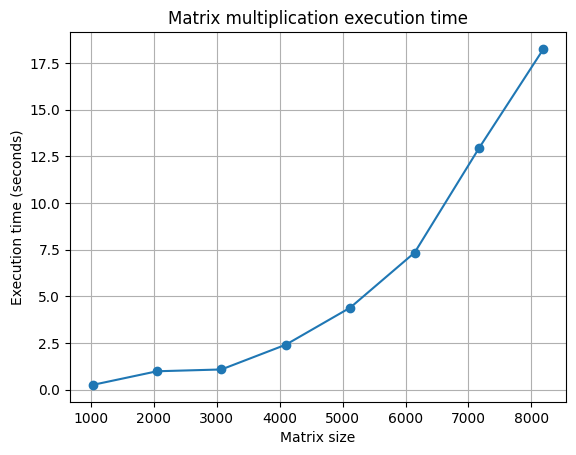

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1024, 8192+1024, 1024), results, 'o-')
plt.xlabel("Matrix size")
plt.ylabel("Execution time (seconds)")
plt.title("Matrix multiplication execution time")
plt.grid(True)
plt.show()

# TPU version

Run the following: Click on ``Runtime`` menu > Click on ``Change runtime type`` > Choose ``v2-8 TPU`` under ``Hardware accelerator`` > Click on ``Save``

In [ ]:
import time
def benchmark(func, A, B, label, runs=3):
    times = []
    size = A.shape[0] - 1
    for _ in range(runs):
        torch.cuda.empty_cache()
        start = time.time()
        _ = func(A, B)
        print(f"{_[size][size]*_[int(size/2)][int(size/2)]*_[size][int(size/2)]*_[int(size/2)][size]*0}")
        torch.cuda.synchronize() if torch.cuda.is_available() else None
        times.append(time.time() - start)
    avg_time = sum(times) / len(times)
    print(f"{label}: {avg_time:.4f} seconds")
    return avg_time

In [ ]:
import torch_xla.core.xla_model as xm

tpu = xm.xla_device()

In [ ]:
import torch

MAT = lambda N : torch.randn(N, N, device=tpu)

results = []
for N in range(1024, 8192+1024, 1024):
  results.append(benchmark(torch.matmul, MAT(N), MAT(N), f"N = {N}"))

-0.0
-0.0
-0.0
N = 1024: 0.2530 seconds
-0.0
-0.0
-0.0
N = 2048: 0.2627 seconds
0.0
0.0
0.0
N = 3072: 0.3373 seconds
0.0
0.0
0.0
N = 4096: 0.3535 seconds
-0.0
-0.0
-0.0
N = 5120: 0.4866 seconds
-0.0
-0.0
-0.0
N = 6144: 0.5671 seconds
0.0
0.0
0.0
N = 7168: 0.5408 seconds
-0.0
-0.0
-0.0
N = 8192: 0.5673 seconds


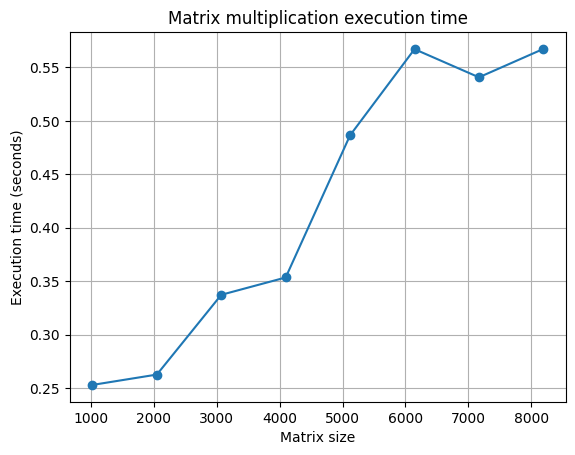

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1024, 8192+1024, 1024), results, 'o-')
plt.xlabel("Matrix size")
plt.ylabel("Execution time (seconds)")
plt.title("Matrix multiplication execution time")
plt.grid(True)
plt.show()

# GPU version

Run the following: Click on ``Runtime`` menu > Click on ``Change runtime type`` > Choose ``GPU T4`` under ``Hardware accelerator`` > Click on ``Save``

In [ ]:
import time
def benchmark(func, A, B, label, runs=3):
    times = []
    for _ in range(runs):
        torch.cuda.empty_cache()
        start = time.time()
        _ = func(A, B)
        torch.cuda.synchronize() if torch.cuda.is_available() else None
        times.append(time.time() - start)
    avg_time = sum(times) / len(times)
    print(f"{label}: {avg_time:.4f} seconds")
    return avg_time

In [ ]:
import torch

gpu = torch.device("cuda")

In [ ]:
MAT = lambda N : torch.randn(N, N, device=gpu)

results = []
for N in range(1024, (8192+1024), 1024):
  results.append(benchmark(torch.matmul, MAT(N), MAT(N), f"N = {N}"))

N = 1024: 0.0014 seconds
N = 2048: 0.0062 seconds
N = 3072: 0.0202 seconds
N = 4096: 0.0363 seconds
N = 5120: 0.0635 seconds
N = 6144: 0.1114 seconds
N = 7168: 0.1752 seconds
N = 8192: 0.2540 seconds


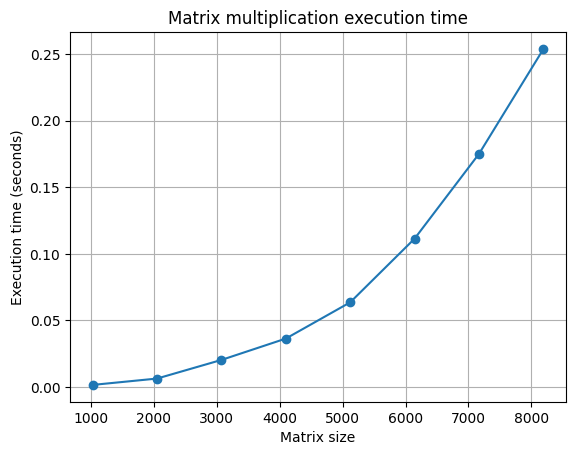

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1024, 8192+1024, 1024), results, 'o-')
plt.xlabel("Matrix size")
plt.ylabel("Execution time (seconds)")
plt.title("Matrix multiplication execution time")
plt.grid(True)
plt.show()